# Python: tracé d'un graphique radial de température 

## Objectifs: 

L'objectif de ce produit est d'obtenir une analyse sur l'évolution journalière de la température et son positionnement par rapport à la normale et aux records historiques du jour julien. 

Dans ce travail, nous allons extraire les données d'Environnement et Changement Climatique Canada pour la station de RIGAUD au Québec. Voici les informations sur cette station: 

- Nom: RIGAUD
- Identifiant: 5252
- Latitude: 45.5 degN
- Longitude: -74.37 degW
- Période couverte: 1963 - aujourd'hui

Une liste des stations est disponible sur ce site: ftp://ftp.tor.ec.gc.ca/Pub/Get_More_Data_Plus_de_donnees/R%E9pertoire%20des%20stations%20FR.csv 

Les données vont être directement télécharger sur le site d'Environnement et Changement Climatique Canada 
http://climate.weather.gc.ca/

Les données sont au format XML. Le XML ou eXtensible Markup Language est un langage informatique de balisage générique. Pour lire un tel format, nous ferons appel à la librairie 'xml.etree.ElementTree': https://docs.python.org/2/library/xml.etree.elementtree.html#module-xml.etree.ElementTree 

Importons dans un premier temps les librairies nécessaires:

- matplotlib: module pour tracer notre graphique
- datetime: module python pour manipuler des dates  
- wget: module pour extraire des données sur un url 
- pandas: module pour travailler avec des structures de données
- os: module "système" pour créer, supprimer ... des fichiers de notre environnement

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from datetime import date
import os
import wget
import pandas as pd
import xml.etree.ElementTree as ET

A titre d'exempe, on va extraire l'année 2000 des enregistrements quotidiens de la station de RIGAUD (identifiant: 5252).

In [2]:
id_stat = 5252
year = 2000
wget.download('http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=xml&stationID='+str(int(id_stat))+'&Year='+str(year)+'&Month=01&Day=14&timeframe=2')
tmp_file ='eng-daily-0101'+str(year)+'-1231'+str(year)+'.xml'
tree=ET.parse(tmp_file)
os.remove(tmp_file)
root=tree.getroot()
stationsdata = root.findall('.//stationdata')

-1 / unknown

Notre fichier XML a la structure suivant:  

 <stationdata year="1955" month="1" day="1">
    <maxtemp units="°C" description="Maximum Temperature">3.3</maxtemp>
    <mintemp units="°C" description="Minimum Temperature">-4.4</mintemp>
    <meantemp units="°C" description="Mean Temperature">-0.6</meantemp>
    <heatdegdays units="°C" description="Heating Degree Days">18.6</heatdegdays>
    <cooldegdays units="°C" description="Cooling Degree Days">0.0</cooldegdays>
    <totalrain units="mm" description="Total Rain">0.0</totalrain>
    <totalsnow units="cm" description="Total Snow">0.0</totalsnow>
    <totalprecipitation units="mm" description="Total Precipitation">0.0</totalprecipitation>
    <snowonground units="cm" description="Snow on Ground"/>
    <dirofmaxgust units="10s Deg" description="Direction of Maximum Gust"/>
    <speedofmaxgust units="km/h" description="Speed of Maximum Gust"/>
</stationdata>

Nous devons cibler les balises maxtemp et mintemp pour notre travail, donc les champs stationdata[0] et station[1].

In [3]:
resultmax = []
resultmin = []
for stationdata in stationsdata:
    champs1=stationdata.find('maxtemp')              
    resultmax.append(champs1.text)   #  on fait une boucle sur les jours de l annee
    data_max=np.array(resultmax,"float")     
for stationdata in stationsdata:
    champs2=stationdata.find('mintemp')              
    resultmin.append(champs2.text)   #  on fait une boucle sur les jours de l annee
    data_min=np.array(resultmin,"float") 

On obtient ainsi pour mintemp et maxtemp deux listes de données resultmin et resultmax respectivement avec une valeur par jour d'enregistrement.
On va afficher les premières valeur de la liste resultmax. 

In [4]:
print(resultmax[0:5])
type(resultmax)

['-1.0', '5.5', '2.0', '4.0', '-3.0']


list

Nous pouvons faire de même sur l'ensemble de la période d'enregistrement de la station (1963-2017) en appliquant une boucle for sur les années. 
Pour chaque année et chaque variable à extraire on va incrémenter une liste dans les variables min_array = [] et max_array = []. 

In [5]:
yi = 1963
yf = 2017
id_stat = 5252
station = 'RIGAUD'
max_array = []
min_array = []
for year in range(yi,yf+1):    ### Boucle sur les annees
    wget.download('http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=xml&stationID='+str(int(id_stat))+'&Year='+str(year)+'&Month=01&Day=14&timeframe=2')
    tmp_file ='eng-daily-0101'+str(year)+'-1231'+str(year)+'.xml' 

  #  #  # le fichier d entree est au format xml: besoin de connaitre l arborescence du fichier pour extraire la variable souhaitee: ici la precipitation
    tree=ET.parse(tmp_file)
    os.remove(tmp_file)
    root=tree.getroot()
    stationsdata = root.findall('.//stationdata')
    resultmax = []
    resultmin = []
    for  stationdata in stationsdata:
         champs1=stationdata.find('maxtemp')              
         resultmax.append(champs1.text)   #  on fait une boucle sur les jours de l annee
         data_max=np.array(resultmax,"float")     
    for  stationdata in stationsdata:
         champs2=stationdata.find('mintemp')              
         resultmin.append(champs2.text)   #  on fait une boucle sur les jours de l annee
         data_min=np.array(resultmin,"float") 
         
    max_array.append(data_max)
    min_array.append(data_min)
len(max_array)

-1 / unknown

55

Pour chaque champs min_array et max_array, on obient une liste de listes. Soit 56 années * tous les jours par année. On va redimensionner pour travailler sur les listes uniques. 

In [6]:
def flatten(input):
    new_list = []
    for i in input:
        for j in i:
            new_list.append(j)
    return new_list
min_array=flatten(min_array) 
max_array=flatten(max_array)
len(min_array)

20089

Ainsi nous avons maintenant pour chaque champs min_array et max_array deux listes de 20454 jours. 
Sachant que la période s'étend du 1er janvier 1963 au 31 décembre 2018, on peut ajouter une dimension temporelle  à nos dataframe avec le module datetime de python. 

In [7]:
start = date(1963, 1, 1)
end = date(2017, 12, 31)
delta=(end-start) 
nb_days = delta.days + 1 
rng = pd.date_range(start, periods=nb_days, freq='D')
tmin_dataset = pd.Series(min_array, index=rng)
tmax_dataset = pd.Series(max_array, index=rng)

Nous avons ainsi deux dataframes de ce type: 

In [8]:
print(tmin_dataset.head())

1963-01-01   -15.0
1963-01-02     NaN
1963-01-03    -6.7
1963-01-04    -6.7
1963-01-05    -6.7
Freq: D, dtype: float64


L'un des gros avantage des dataframe de pandas est que nous pouvons très facilement travailler avec les séries temporelles. 
Nous allons ici calculer les climatologies journalières des variables tmin_dataset et tmax_dataset sur la période normale 1981-2010.
Aussi, avec les outils groupby de pandas, nous pouvons calculer les minimum et maximum journaliers de tmin_dataset et tmax_dataset sur la période complète de l'enregistrement. 

In [9]:
mintmin = []
maxtmax = []
climtmin = []
climtmax = []

clim_min_dataset=tmin_dataset['1981':'2010']
clim_max_dataset=tmax_dataset['1981':'2010']
climtmin = clim_min_dataset.groupby([clim_min_dataset.index.month, clim_min_dataset.index.day]).mean()
climtmax = clim_max_dataset.groupby([clim_max_dataset.index.month, clim_max_dataset.index.day]).mean()

mintmin = tmin_dataset.groupby([tmin_dataset.index.month, tmin_dataset.index.day]).min()
maxtmax = tmax_dataset.groupby([tmax_dataset.index.month, tmax_dataset.index.day]).max()


data_min_tmin=np.array(mintmin,"float")  
data_max_tmax=np.array(maxtmax,"float") 
data_clim_tmax=np.array(climtmax,"float")     
data_clim_tmin=np.array(climtmin,"float") 

print(len(data_clim_tmax))
print(len(maxtmax))


366
366


Nous pouvons maintenant tracer notre graphique radial 

D:\Utilisateurs\guillaume\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  warnings.warn(message, mplDeprecation, stacklevel=1)


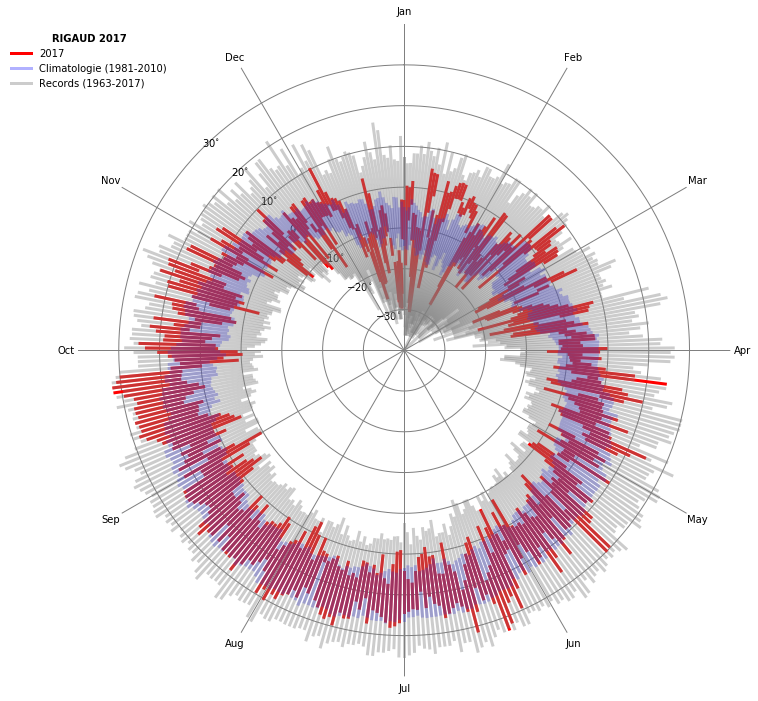

In [10]:
x = []
ndays=366
Azs=np.arange(0,ndays)
angle = Azs * 2.0 * np.pi / ndays

fig=plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, polar=True)

ax.plot([angle[0],angle[0]], [data_min[0],data_max[0]],'red', alpha=1.0, linewidth=3.0, label=str(yf))
ax.plot([angle[0],angle[0]], [data_clim_tmin[0],data_clim_tmax[0]],'blue', alpha=0.3, linewidth=3.0, label='Climatologie (1981-2010)')
ax.plot([angle[0],angle[0]], [data_min_tmin[0],data_max_tmax[0]],'grey', alpha=0.4, linewidth=3.0, label='Records ('+str(yi)+'-'+str(yf)+')')

leg=plt.legend(bbox_to_anchor=(0.15, 1.0),fontsize=10)
leg.get_frame().set_linewidth(0.0)
leg.set_title(str(station)+' '+str(yf), prop={'size': 10, 'weight': 'heavy'})

ax.plot([angle,angle], [data_min,data_max],'red', alpha=1.0, linewidth=3.0)
ax.plot([angle,angle], [data_clim_tmin,data_clim_tmax],'blue', alpha=0.3, linewidth=3.0)
ax.plot([angle,angle], [data_min_tmin,data_max_tmax],'grey', alpha=0.4, linewidth=3.0)

ax.set_rmin(-40)
ax.set_rmax(+40)
ax.grid(True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2)

ax.set_rticks([-30,-20, -10, 0, 10, 20, 30])  # less radial ticks
ax.set_rlabel_position(-45.)  # get radial labels away from plotted line
ax.set_yticklabels(['$-30^{\circ}$', '$-20^{\circ}$', '$-10^{\circ}$', '$0^{\circ}$', '$10^{\circ}$', '$20^{\circ}$', '$30^{\circ}$' ],
   fontsize=10)

# Set the major and minor tick locations
ax.xaxis.set_major_locator(ticker.MultipleLocator(np.pi/6))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(np.pi/12))
ax.grid(linewidth=1,color='grey', linestyle='-')

# Turn off major tick labels
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.set_frame_on(False)

# Set the minor tick width to 0 so you don't see them
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

# Set the names of your ticks, with blank spaces for the major ticks
ax.set_xticklabels(['','Jan','','Feb','','Mar','','Apr','','May','','Jun','','Jul','','Aug','','Sep','','Oct','','Nov','','Dec'],minor=True)

plt.show()
